In [1]:
import sys
import os
from src.data import CICIDS2017
from src.data.utils import balanced_sample, encode_labels
from sklearn.model_selection import train_test_split
from src.models import TabNetModel
from src.models import PreConfigured_LogisticRegression, PreConfigured_RandomForest, PreConfigured_LinearSVC, PreConfigured_DecisionTree, PreConfigured_KNeighbors
from src.pipelines import TAPipeline, TTPipeline, plot_accuracies

import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

### Data

In [2]:
data = CICIDS2017(pca=False, classes_mapping=True)
data.load()
data = balanced_sample(data.data, "Label", 10000)
# x, y = encode_labels(data, "Label")
x = data.drop(columns=["Label"]).values
y = data["Label"].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

2025-03-09 22:15:05,993 - INFO - Loading dataset...


In [3]:
data["Label"].value_counts()

Label
BENIGN          10000
DoS             10000
DDoS            10000
Port Scan       10000
Brute Force      9152
Web Attack       2143
Bot              1953
Infiltration       36
Heartbleed         11
Name: count, dtype: int64

### Models

#### Preparing

In [4]:
logreg = PreConfigured_LogisticRegression()
svc = PreConfigured_LinearSVC()
randomforest = PreConfigured_RandomForest()
kneighbors = PreConfigured_KNeighbors()
decision_tree = PreConfigured_DecisionTree()
tabnet = TabNetModel(pretrain=True)

c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


#### Training

In [ ]:
logreg_pl = TTPipeline(logreg)
logreg_pl.train(X_train, y_train, cv=5)
logreg_results = logreg_pl.evaluate(X_test, y_test)
logreg.save()

c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
2025-03-07 01:42:49,163 - INFO - Cross-validation scores: [0.81730769 0.82434334 0.83090994 0.82692308 0.82833021 0.8217636
 0.82312925 0.81749941 0.82758621 0.8296974 ]
2025-03-07 01:42:49,164 - INFO - Mean cross-validation score: 0.8247
2025-03-07 01:42:49,249 - INFO - Model saved to models\ml\svc.zip


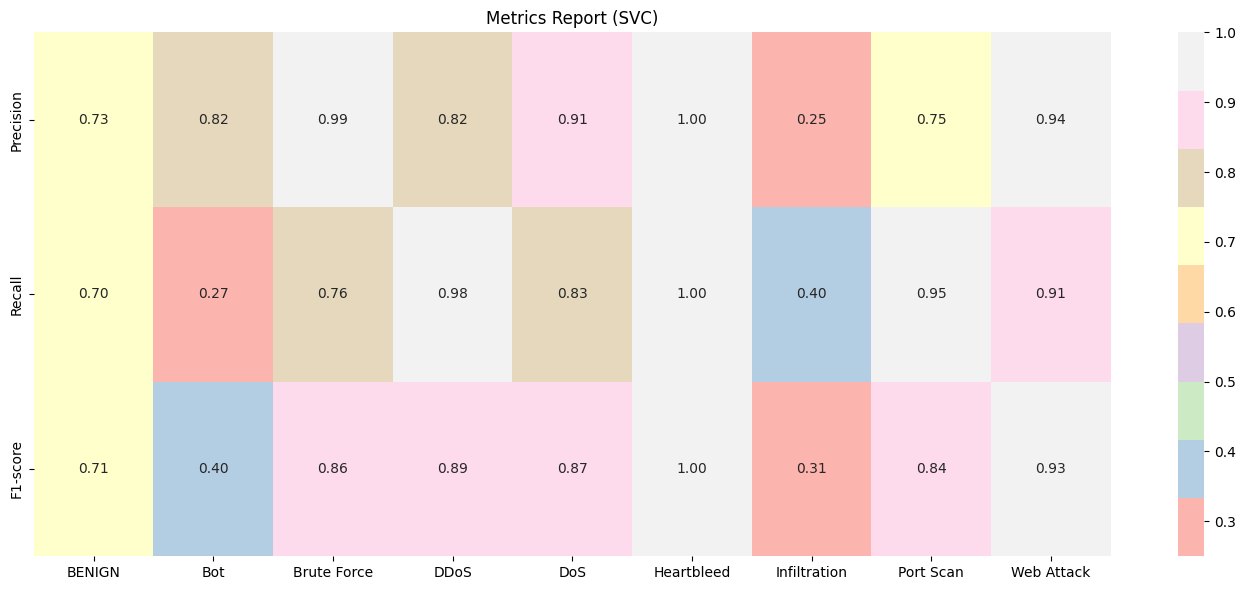

In [ ]:
svc_pl = TTPipeline(svc)
svc_pl.train(X_train, y_train, cv=5)
svc_results = svc_pl.evaluate(X_test, y_test)
svc.save()

2025-03-09 20:23:58,759 - INFO - Cross-validation scores: [0.9913227  0.98897619 0.99132168 0.99190806 0.99014894]
2025-03-09 20:23:58,760 - INFO - Mean cross-validation score: 0.9907
2025-03-09 20:23:58,859 - INFO - Model saved to models\ml\random_forest.zip


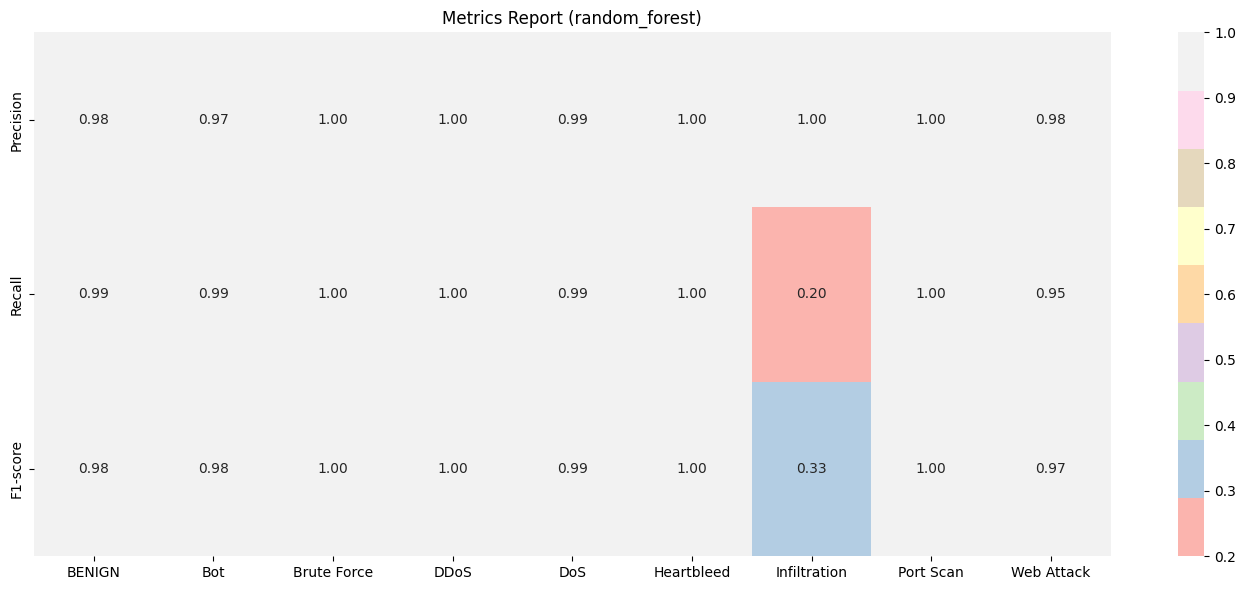

In [ ]:
randomforest_pl = TTPipeline(randomforest)
randomforest_pl.train(X_train, y_train, cv=5)
randomforest_results = randomforest_pl.evaluate(X_test, y_test)
randomforest.save()

2025-03-07 01:42:54,874 - INFO - Cross-validation scores: [0.95743433 0.96575583 0.96376217 0.96047848 0.96024393]
2025-03-07 01:42:54,875 - INFO - Mean cross-validation score: 0.9615
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^

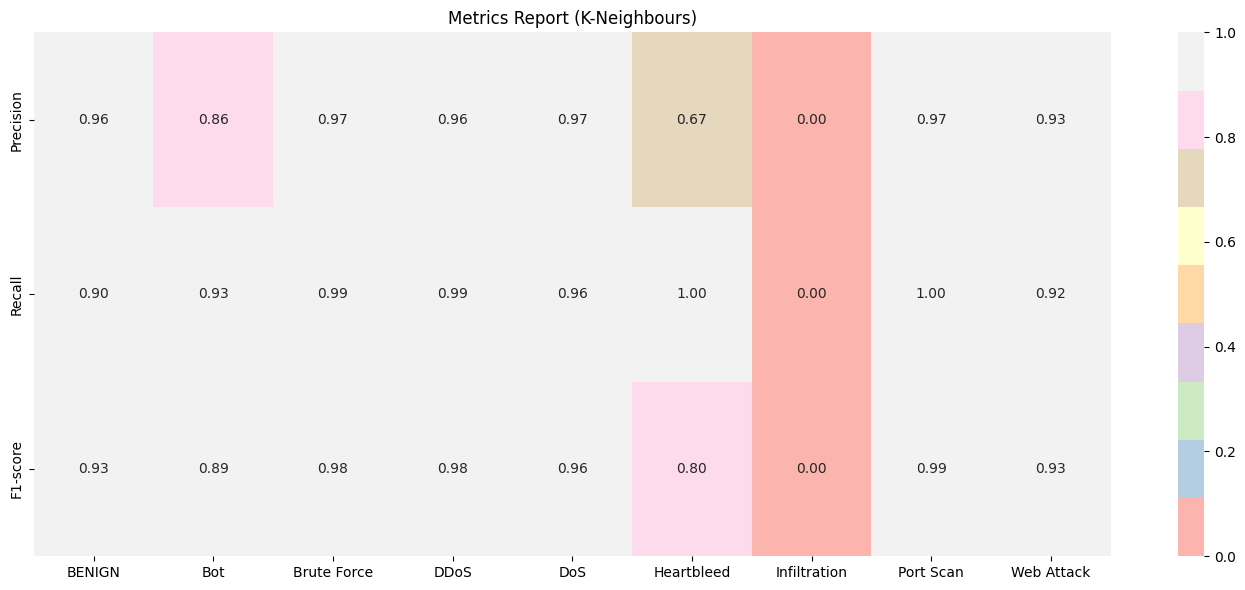

In [ ]:
kneighbors_pl = TTPipeline(kneighbors)
kneighbors_pl.train(X_train, y_train, cv=5)
kneighbors_results = kneighbors_pl.evaluate(X_test, y_test)
kneighbors.save()

2025-03-07 01:42:57,623 - INFO - Cross-validation scores: [0.98839118 0.988038   0.98909347 0.99108713 0.98932802]
2025-03-07 01:42:57,624 - INFO - Mean cross-validation score: 0.9892
2025-03-07 01:42:57,825 - INFO - Model saved to models\ml\decision_tree.zip


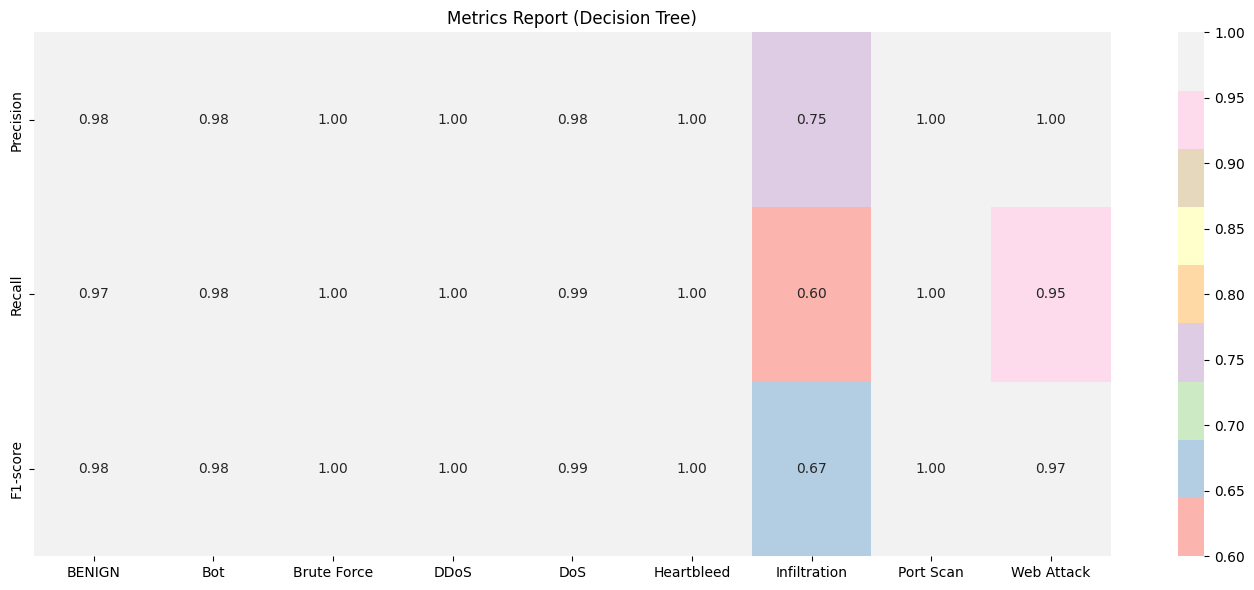

In [ ]:
decision_tree_pl = TTPipeline(decision_tree)
decision_tree_pl.train(X_train, y_train, cv=5)
decision_tree_results = decision_tree_pl.evaluate(X_test, y_test)
decision_tree.save()

2025-03-09 22:15:17,198 - INFO - Pretraining for TabNet...
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 6.64335 |  0:00:04s
epoch 1  | loss: 1.51647 |  0:00:08s
epoch 2  | loss: 1.73644 |  0:00:12s
epoch 3  | loss: 1.27908 |  0:00:16s
epoch 4  | loss: 1.48869 |  0:00:20s
epoch 5  | loss: 1.08577 |  0:00:25s
epoch 6  | loss: 1.19608 |  0:00:29s
epoch 7  | loss: 1.13685 |  0:00:33s
epoch 8  | loss: 1.07016 |  0:00:37s
epoch 9  | loss: 1.29793 |  0:00:41s
epoch 10 | loss: 1.3831  |  0:00:45s
epoch 11 | loss: 1.22066 |  0:00:49s
epoch 12 | loss: 1.21712 |  0:00:53s
epoch 13 | loss: 1.25286 |  0:00:58s
epoch 14 | loss: 0.9975  |  0:01:02s
epoch 15 | loss: 1.23347 |  0:01:06s
epoch 16 | loss: 0.98262 |  0:01:10s
epoch 17 | loss: 0.97606 |  0:01:14s
epoch 18 | loss: 1.53719 |  0:01:18s
epoch 19 | loss: 1.13256 |  0:01:22s
epoch 20 | loss: 1.05191 |  0:01:26s
epoch 21 | loss: 1.43429 |  0:01:30s
epoch 22 | loss: 1.91497 |  0:01:35s
epoch 23 | loss: 1.36654 |  0:01:39s
epoch 24 | loss: 1.31957 |  0:01:43s
epoch 25 | loss: 1.31071 |  0:01:47s
epoch 26 | loss: 1.45604 |  0:01:51s
e

2025-03-09 22:22:08,760 - INFO - Training TabNet model...


epoch 99 | loss: 1.63991 |  0:06:50s


c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_tabnet\abstract_model.py:248: UserWarning: Loading weights from unsupervised pretraining
  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.9639  |  0:00:03s
epoch 1  | loss: 0.17772 |  0:00:07s
epoch 2  | loss: 0.12222 |  0:00:10s
epoch 3  | loss: 0.10131 |  0:00:14s
epoch 4  | loss: 0.0854  |  0:00:17s
epoch 5  | loss: 0.08467 |  0:00:21s
epoch 6  | loss: 0.07267 |  0:00:25s
epoch 7  | loss: 0.06908 |  0:00:28s
epoch 8  | loss: 0.0671  |  0:00:32s
epoch 9  | loss: 0.06597 |  0:00:35s
epoch 10 | loss: 0.0626  |  0:00:39s
epoch 11 | loss: 0.05636 |  0:00:42s
epoch 12 | loss: 0.05986 |  0:00:46s
epoch 13 | loss: 0.07042 |  0:00:49s
epoch 14 | loss: 0.0576  |  0:00:53s
epoch 15 | loss: 0.05459 |  0:00:56s
epoch 16 | loss: 0.0459  |  0:01:00s
epoch 17 | loss: 0.04285 |  0:01:03s
epoch 18 | loss: 0.04452 |  0:01:07s
epoch 19 | loss: 0.04054 |  0:01:11s
epoch 20 | loss: 0.03997 |  0:01:14s
epoch 21 | loss: 0.03824 |  0:01:18s
epoch 22 | loss: 0.03905 |  0:01:21s
epoch 23 | loss: 0.04219 |  0:01:25s
epoch 24 | loss: 0.03734 |  0:01:28s
epoch 25 | loss: 0.0459  |  0:01:32s
epoch 26 | loss: 0.04066 |  0:01:36s
e

RuntimeError: Model must be trained before saving.

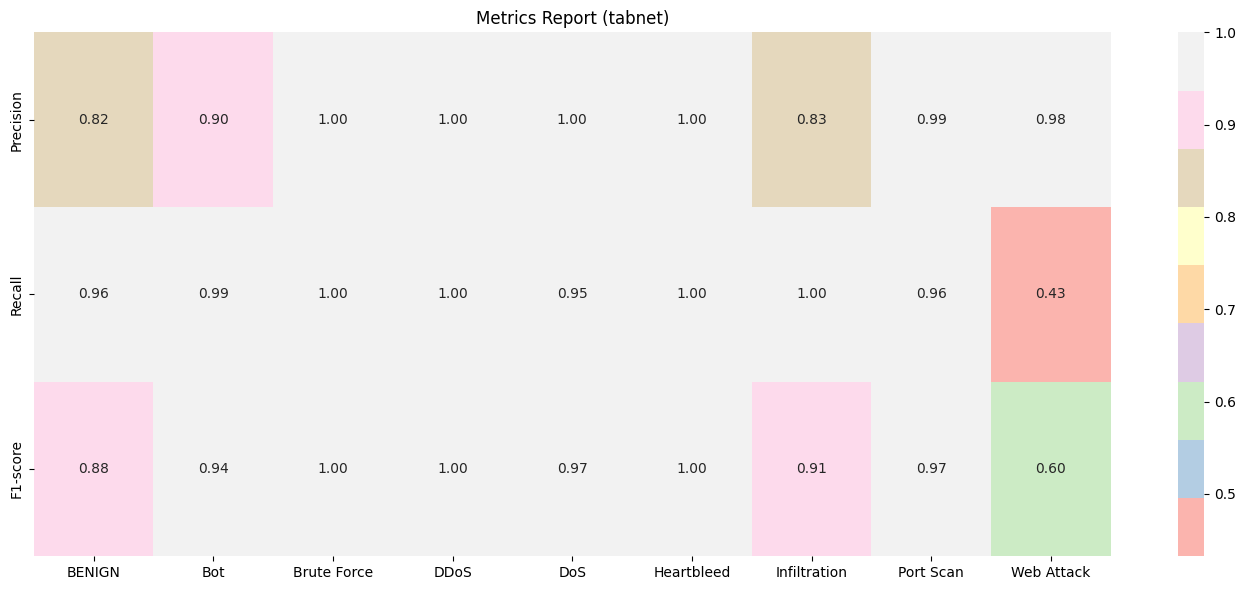

In [ ]:
tabnet_pl = TTPipeline(tabnet)
tabnet_pl.train(X_train, y_train, X_test, y_test)
# tabnet_pl.train(X_train, y_train)
tabnet_results = tabnet_pl.evaluate(X_test, y_test)
tabnet.save()

dict_keys(['loss', 'lr'])


C:\Users\pablo\AppData\Local\Temp\ipykernel_20732\4005485667.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


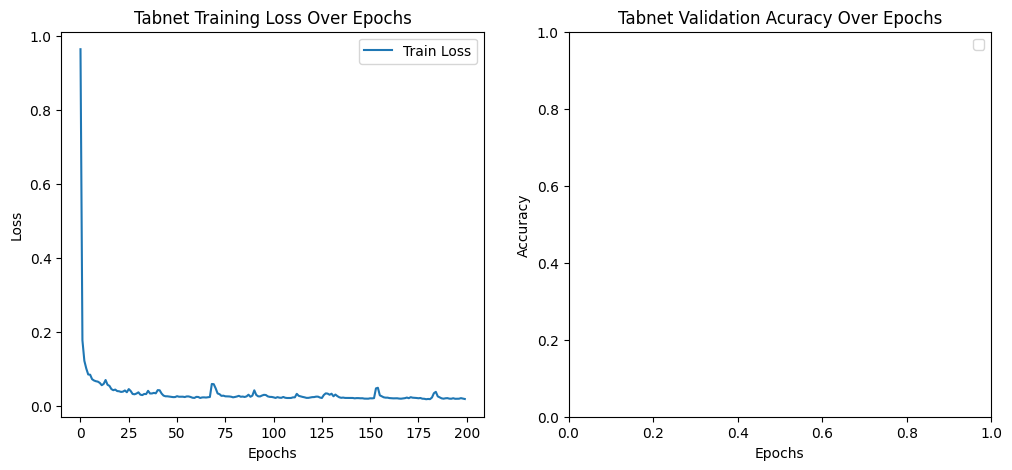

In [ ]:
tabnet.plot_metrics()


#### From loaded

2025-03-09 22:42:23,991 - INFO - Model loaded from models\ml\logistic_regression.zip


0.8109578759733559

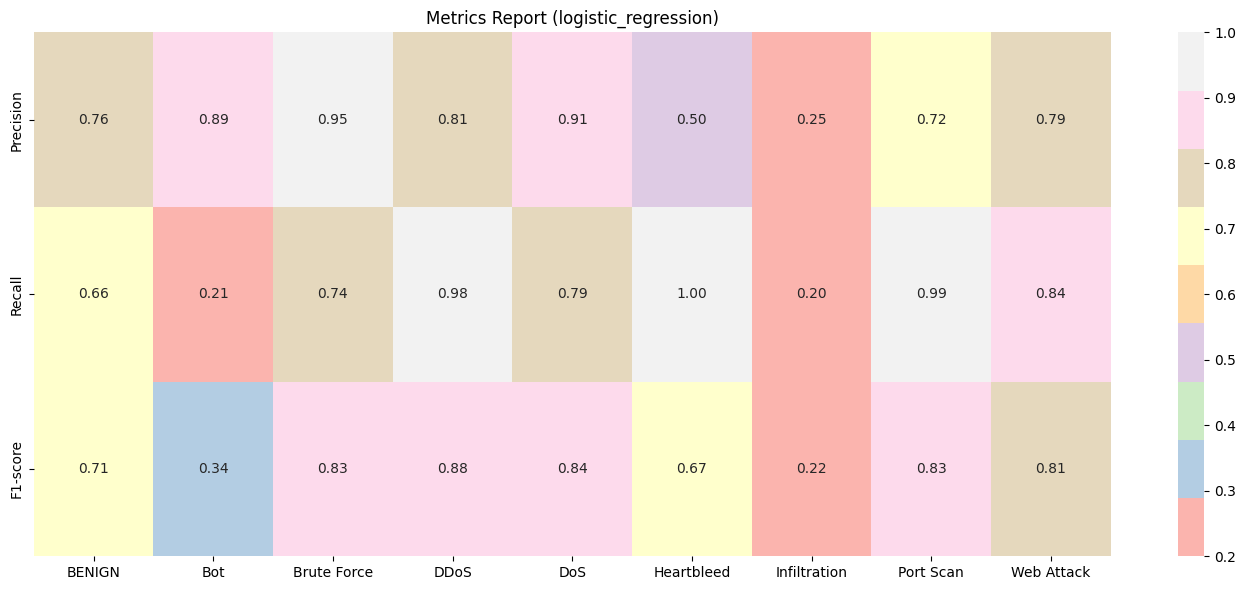

In [7]:
logreg.load()
logreg_pl = TTPipeline(logreg)
logreg_results = logreg_pl.evaluate(X_test, y_test)
logreg_results["accuracy"]

2025-03-09 22:42:24,407 - INFO - Model loaded from models\ml\svc.zip


0.8199643493761141

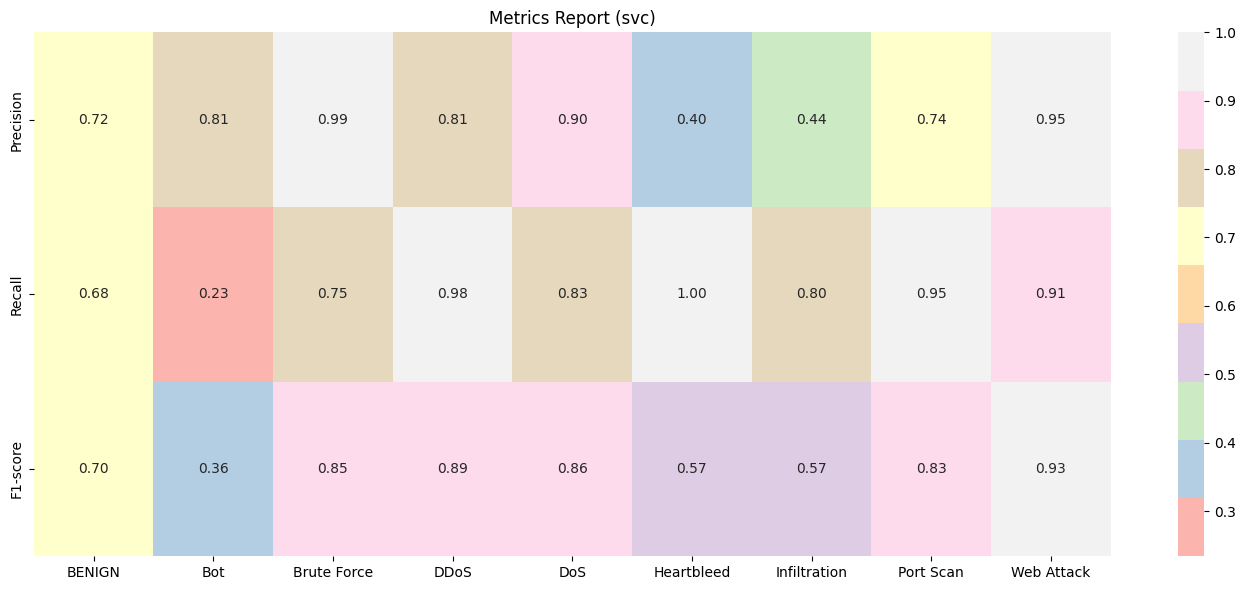

In [8]:
svc.load()
svc_pl = TTPipeline(svc)
svc_results = svc_pl.evaluate(X_test, y_test)
svc_results["accuracy"]

2025-03-09 22:42:24,944 - INFO - Model loaded from models\ml\random_forest.zip


0.9916502486161929

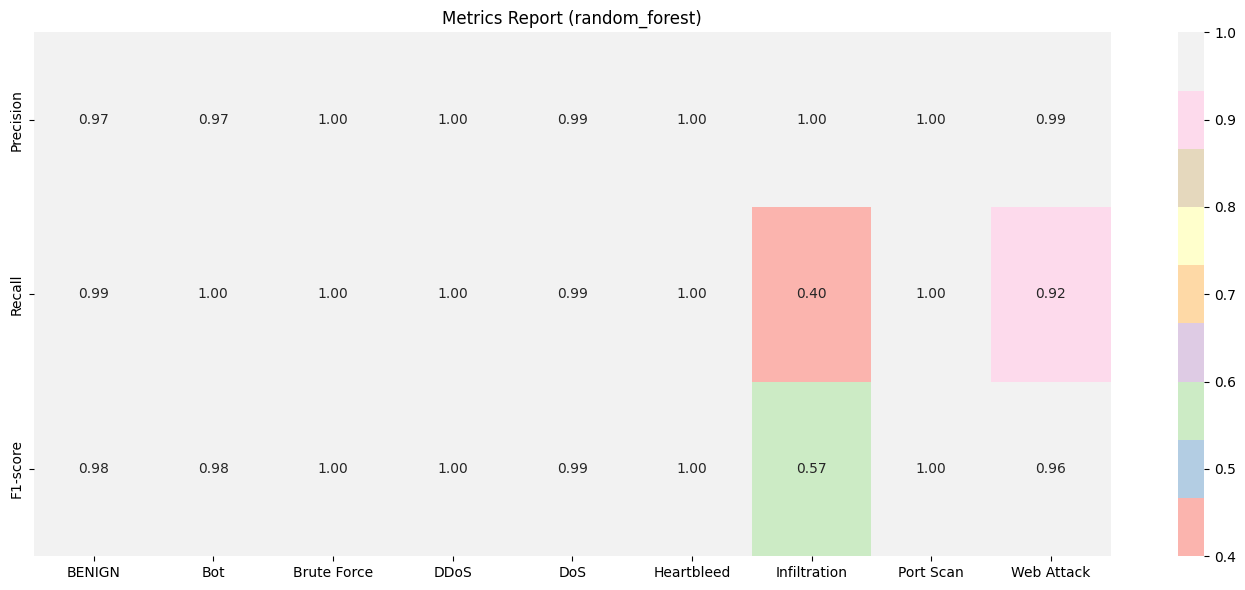

In [9]:
randomforest.load()
randomforest_pl = TTPipeline(randomforest)
randomforest_results = randomforest_pl.evaluate(X_test, y_test)
randomforest_results["accuracy"]

2025-03-09 22:42:25,878 - INFO - Model loaded from models\ml\kneighbors.zip
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", li

0.9644431935453607

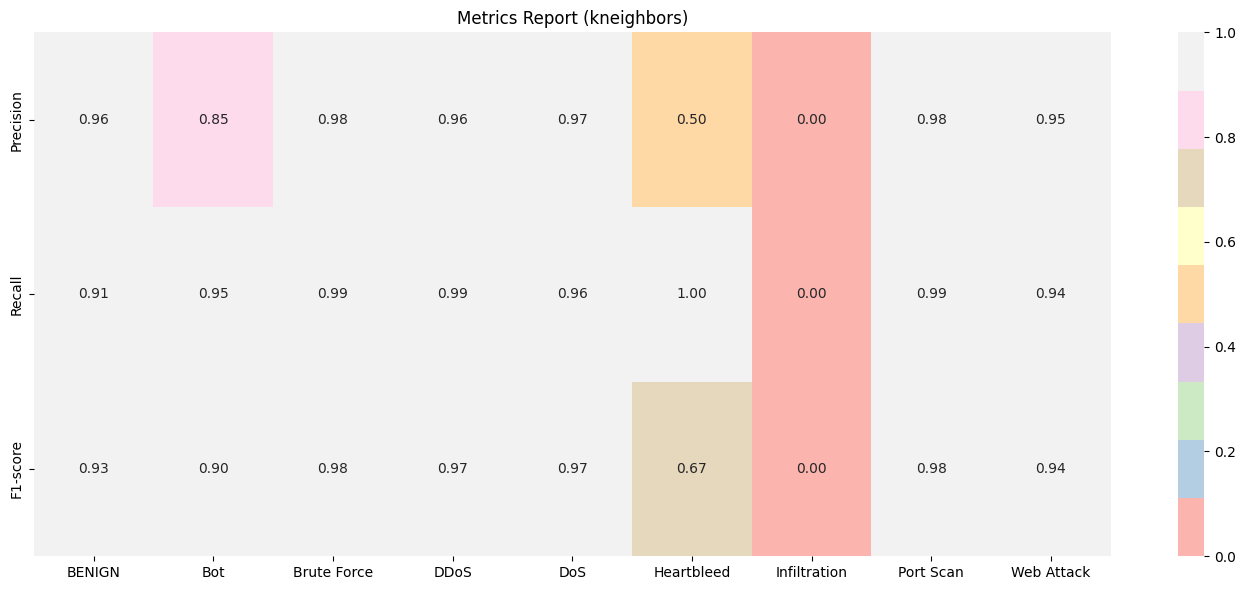

In [10]:
kneighbors.load()
kneighbors_pl = TTPipeline(kneighbors)
kneighbors_results = kneighbors_pl.evaluate(X_test, y_test)
kneighbors_results["accuracy"]

2025-03-09 22:42:26,683 - INFO - Model loaded from models\ml\decision_tree.zip


0.9887419082465522

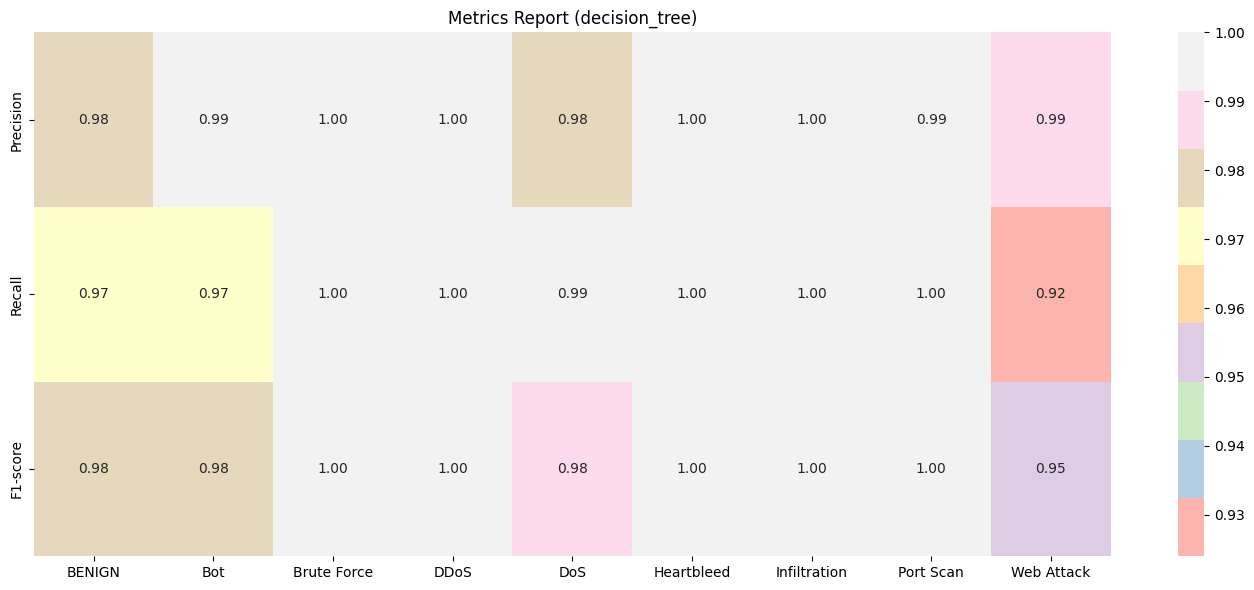

In [11]:
decision_tree.load()
decision_tree_pl = TTPipeline(decision_tree)
decision_tree_results = decision_tree_pl.evaluate(X_test, y_test)
decision_tree_results["accuracy"]

c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pablo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:15

0.9529974669293555

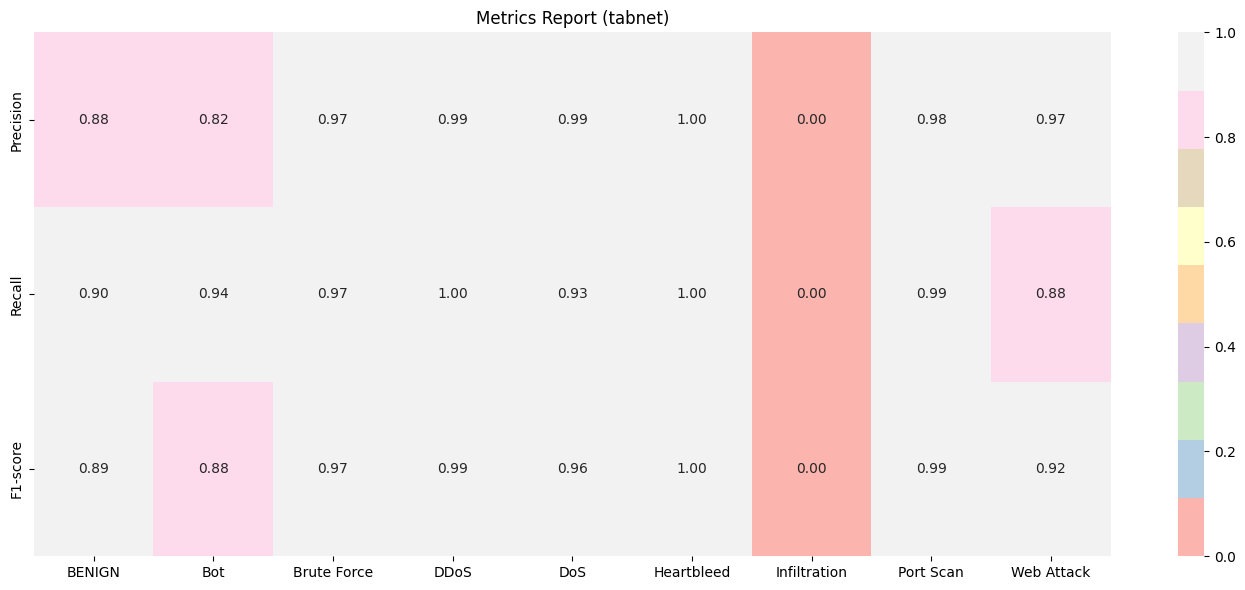

In [ ]:
tabnet.load()
tabnet_pl = TTPipeline(tabnet)
tabnet_results = tabnet_pl.evaluate(X_test, y_test)
tabnet_results["accuracy"]

#### Performance

In [12]:
accuracies = [
    logreg_results["accuracy"],
    svc_results["accuracy"],
    randomforest_results["accuracy"],
    kneighbors_results["accuracy"],
    decision_tree_results["accuracy"],
    tabnet_results["accuracy"]
]

models_names = ['Logistic Regression', 'SVM', "Random Forest", "KNeighbors", "Decision Tree", "TabNet"]

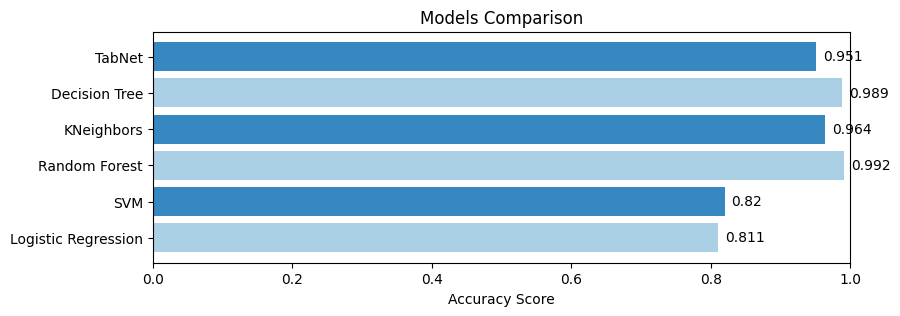

In [13]:
accuracy_plot = plot_accuracies(accuracies, models_names)